In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import adjusted_rand_score
from sklearn import mixture

In [2]:
# 产生分隔的高斯分布的聚类簇 样本分布见 6-1
# centers 核心点的数组
# num 样本数
# std 每簇的标准差
def create_data(centers,num=1000,std=0.7):
    x, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return x, labels_true

In [11]:
def test_GM(*data):
    x,labels_true = data
    gm = mixture.GaussianMixture()
    gm.fit(x)
    predicted_labels = gm.predict(x)
    print('ARI:{0}'.format(adjusted_rand_score(labels_true,predicted_labels))) #ARI 可以理解为聚类效果 越大越好

In [12]:
x, labels_true = create_data(((1,1),(2,2),(1,2),(10,20)),1000,0.5)
test_GM(x, labels_true)

ARI:0.0


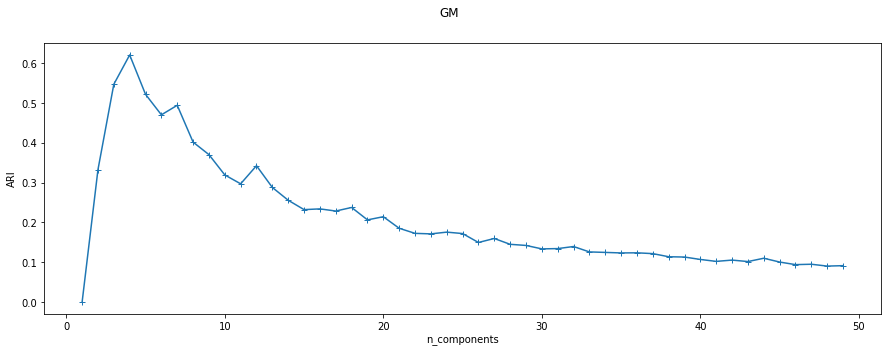

In [15]:
# 簇数量的影响
def test_GM_n_components(*data):
    x,labels_true = data
    nums = range(1,50)
    ARIs =[]
    for num in nums:
        gm =  mixture.GaussianMixture(n_components=num)
        gm.fit(x)
        predicted_labels = gm.predict(x)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        
    # 绘图
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    ax = fig.add_subplot(111)
    ax.plot(nums, ARIs, marker='+')
    ax.set_xlabel('n_components')
    ax.set_ylabel('ARI')
    fig.suptitle('GM')
    plt.show()

x, labels_true = create_data(((1,1),(2,2),(1,2),(10,20)),1000,0.5)
test_GM_n_components(x, labels_true)

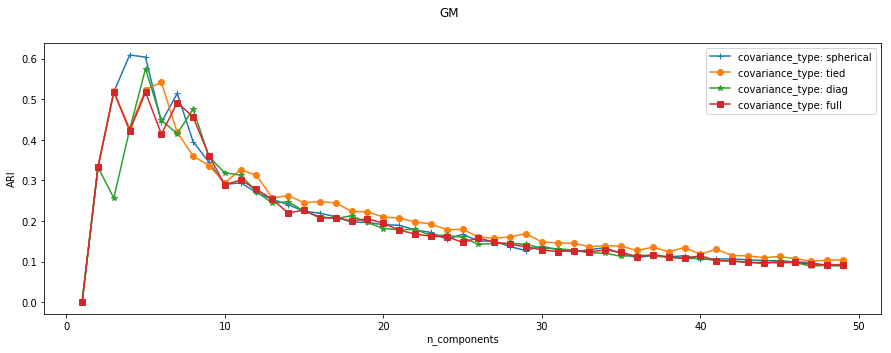

In [16]:
# 协方差类型的影响
def test_gm_cov_type(*data):
    x,labels_true = data
    nums = range(1,50)
    # 绘图
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    ax = fig.add_subplot(111)
    
    cov_types = ['spherical','tied','diag','full']
    markers = '+o*s'
    for i, cov_type in enumerate(cov_types):
        ARIs =[]
        for num in nums:
            gm = mixture.GaussianMixture(n_components=num, covariance_type=cov_type)
            gm.fit(x)
            predicted_labels = gm.predict(x)
            ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        ax.plot(nums, ARIs, marker=markers[i], label='covariance_type: {0}'.format(cov_type))
        
    ax.set_xlabel('n_components')
    ax.set_ylabel('ARI')
    ax.legend(loc='best')
    fig.suptitle('GM')
    plt.show()

x, labels_true = create_data(((1,1),(2,2),(1,2),(10,20)),1000,0.5)
test_gm_cov_type(x, labels_true)